Suppose predictors (columns of the design matrix $X \in \mathbb{R}^{n \times(p+1)}$ ) in a regression problem split up into $J$ groups:
$$
X=\left[\begin{array}{lll}
1 & X_{(1)} & X_{(2)} & \dots & X_{(J)}
\end{array}\right]
$$
where $1=(1,1, \cdots ,1) \in \mathbb{R}^{n} .$ To achieve sparsity over non-overlapping groups rather than individual predictors, we may write $\beta=\left(\beta_{0}, \beta_{(1)}, \ldots, \beta_{(J)}\right),$ where $\beta_{0}$ is an intercept term and each $\beta_{(j)}$ is an appropriate coefficient block of $\beta$ corresponding to $X_{(j)},$ and solve the group lasso problem:
$$
\min _{\beta \in \mathbb{R}^{p+1}} g(\beta)+\lambda \sum_{j=1}^{J} w_{j}\left\|\beta_{(j)}\right\|_{2}
$$
A common choice for weights on groups $w_{j}$ is $\sqrt{p_{j}},$ where $p_{j}$ is number of predictors that belong to the $j$ th group, to adjust for the group sizes.

The proximal operator $\mathsf{prox}_{t}(x)$ for $h(\beta)=\lambda \sum_{j=1}^{J} w_{j}\left\|\beta_{(j)}\right\|_{2}$ is given by
$$\mathsf{prox}_{t}(x)=\arg\min_{\beta}\frac{1}{2t}\|\beta-x\|^2+h(\beta)=\sum_{j=1}^J\left(\frac{1}{2t}\left\|\beta_{(j)}-x_{(j)}\right\|^2+\lambda w_j\left\|\beta_{(j)}\right\|\right)+\frac{1}{2t}(\beta_0-x_0)^2.$$
Thus this problem is decoupled, the minimization can be done via subgradient optimality for each group $j$. Obviously,
$$\beta_0=x_0.$$
For each $j\in[J]$, $\beta_{(j)}$ satisfies the subgradient optimality 
$$0\in \partial \left(\frac{1}{2t}\left\|\beta_{(j)}-x_{(j)}\right\|^2+\lambda w_j\left\|\beta_{(j)}\right\|\right)=\frac{1}{t}\left(\beta_{(j)}-x_{(j)}\right)+\lambda w_j\partial \|\beta_{(j)}\|,$$
where 
$$
\partial \|\beta_{(j)}\|=\begin{cases}\frac{\beta_{(j)}}{\|\beta_{(j)}\|},&\beta_{(j)}\neq 0\\
\left\{g\mid\|g\|\leq 1\right\},&\beta_{(j)}=0.\end{cases}$$
Therefore, 
* If the solution $\beta_{(j)}\neq 0$, then $x_{(j)}-\beta_{(j)}=\lambda tw_j\frac{\beta_{(j)}}{\|\beta_{(j)}\|}$ and hence
$\|x_{(j)}\|=\|\beta_{(j)}\|+\lambda tw_j$.
* If the solution $\beta_{(j)}= 0$, then $x_{(j)}\in\{\lambda tw_j g\mid \|g\|\leq 1\}$ and hence $\|x_{(j)}\|\leq \lambda tw_j$.

Thus if $\|x_{(j)}\|>\lambda tw_j$, then $\beta_{(j)}\neq 0$ and $\beta_{(j)}$ satisfies $x_{(j)}-\beta_{(j)}=\lambda tw_j\frac{\beta_{(j)}}{\|\beta_{(j)}\|}$.
If $\|x_{(j)}\|<\lambda tw_j$, then $\beta_{(j)}=0$ and so is when $\|x_{(j)}\|=\lambda tw_j$.


Hence
$$\beta_{(j)}=\begin{cases}x_{(j)}-\lambda tw_j\frac{\beta_{(j)}}{\|\beta_{(j)}\|}, &\|x_{(j)}\|>\lambda tw_j\\
0,&\|x_{(j)}\|\leq\lambda tw_j.\end{cases}$$
When $\|x_{(j)}\|>\lambda tw_j$, one can verify 
$$\beta_{(j)}=\left[1-\frac{\lambda tw_j}{\|x_{(j)}\|}\right]x_{(j)}$$
satisfies the KKT condition. Thus
$$\mathsf{prox}_t(x)=\left(1-\frac{\lambda tw_j}{\|x_{(j)}\|}\right)_+x_{(j)}.$$

Let $g(\beta)=\left\|y-X\beta\right\|^2$, the gradient is given by
$$\nabla g(\beta)=-2X^T(y-X\beta)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = np.loadtxt("Datasets\\X.csv", skiprows = 1, delimiter = ',')
X = np.hstack((X,np.ones(len(X)).reshape(len(X),1)))
Y = np.loadtxt("Datasets\\y.csv", skiprows = 1, delimiter = ',')
group = {'1':[0,1,2], '2':[3,4,5], '3':[6,7], '4':[8], '5':[9,10], '6':[11], '7':[12], '8':[13,14,15]}

In [3]:
def proximal_gradient_method(X, y, group, iteration = 1000, lbd = 4, stepsize = 0.002, intercept = 0):
    beta = np.zeros(X.shape[-1]) + intercept
    beta_list = [beta]
    loss_list = []
    for i in range(iteration):
        beta = beta + stepsize * 2 * np.dot(X.transpose(), y - np.dot(X, beta))
        penalty = 0
        for k in group.keys():
            lbd_prime = lbd * stepsize * np.sqrt(len(group[k]))
            if np.linalg.norm(beta[group[k]]) > lbd_prime:
                beta[group[k]] = (1 - lbd_prime * 1.0 / np.linalg.norm(beta[group[k]])) * beta[group[k]]
            else:
                beta[group[k]] = beta[group[k]] * 0
            #also we can use, beta[group[k]] = max(0, 1 - lbd_prime * 1.0 / np.linalg.norm(beta[group[k]])) * beta[group[k]]
            penalty = penalty + np.sqrt(len(group[k])) * np.linalg.norm(beta[group[k]])
        beta_list.append(beta)
        loss_list.append(np.linalg.norm(y - np.dot(X, beta)) ** 2 + lbd * penalty)
    return beta_list, loss_list

In [4]:
beta, loss = proximal_gradient_method(X, Y, group, iteration = 1000, lbd = 4, stepsize = 0.002)
beta = np.array(beta)
print "loss: {}".format(loss[-1]) + " and " + '''parameter: 
{}'''.format(beta[-1])

loss: 84.6952082766 and parameter: 
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  3.03361690e-01 -5.41959393e-02
 -2.88781597e-01 -2.25049470e-01  3.42582393e-02 -2.74776699e-01
 -4.58063195e-01  2.30262989e-02  2.57587425e-03 -9.19686292e-03
  3.01826872e+00]


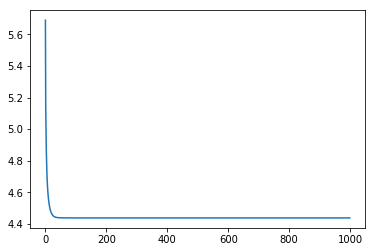

In [5]:
plt.plot(range(1000), np.log(loss))

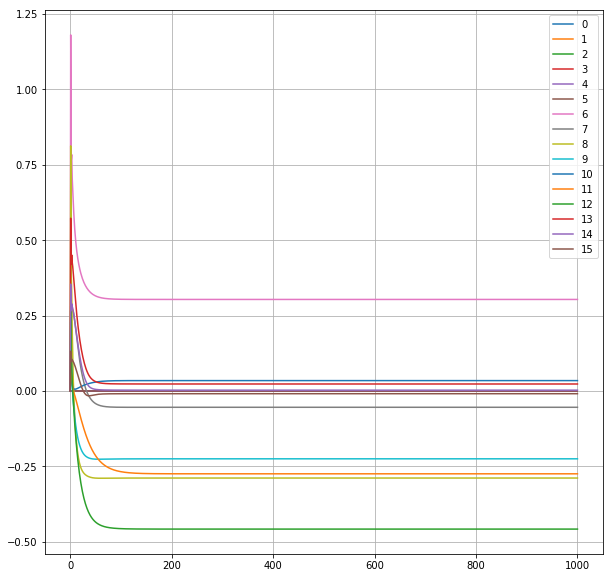

In [6]:
plt.figure(figsize=(10,10))
for l in range(16):
    plt.plot(range(1001), beta[:,l], label = l)
plt.legend()
plt.grid()

## Accelerated version

In [7]:
def proximal_gradient_method_accelerated(X, y, group, iteration = 1000, lbd = 4, stepsize = 0.002, intercept = 0):
    beta = np.zeros(X.shape[-1]) + intercept
    beta_list = [beta, beta]
    loss_list = []
    for i in range(iteration):
        beta = beta_list[-1] + 1.0 * (i - 2) / (i + 1) * (beta_list[-1] - beta_list[-2])
        beta = beta + stepsize * 2 * np.dot(X.transpose(), y - np.dot(X, beta))
        penalty = 0
        for k in group.keys():
            lbd_prime = lbd * stepsize * np.sqrt(len(group[k]))
            if np.linalg.norm(beta[group[k]]) > lbd_prime:
                beta[group[k]] = (1 - lbd_prime * 1.0 / np.linalg.norm(beta[group[k]])) * beta[group[k]]
            else:
                beta[group[k]] = beta[group[k]] * 0
            penalty = penalty + np.sqrt(len(group[k])) * np.linalg.norm(beta[group[k]])
        beta_list.append(beta)
        loss_list.append(np.linalg.norm(y - np.dot(X, beta)) ** 2 + lbd * penalty)
    return beta_list, loss_list

## Comparison

The sol to vanilla method is 
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  3.03361690e-01 -5.41959392e-02
 -2.88781597e-01 -2.25049470e-01  3.42582392e-02 -2.74776699e-01
 -4.58063195e-01  2.30262989e-02  2.57587424e-03 -9.19686291e-03
  3.01826872e+00]
The sol to accelerated method is 
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  3.03361690e-01 -5.41959393e-02
 -2.88781597e-01 -2.25049470e-01  3.42582393e-02 -2.74776699e-01
 -4.58063195e-01  2.30262989e-02  2.57587425e-03 -9.19686292e-03
  3.01826872e+00]


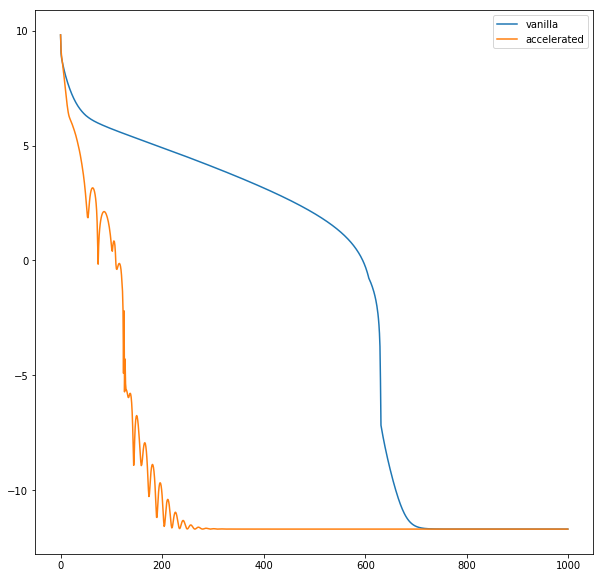

In [8]:
f_star = 84.6952
beta, loss = proximal_gradient_method(X, Y, group, iteration = 1000, lbd = 4, stepsize = 0.002, intercept = 10)
print '''The sol to vanilla method is 
{}'''.format(beta[-1])
beta, loss_2 = proximal_gradient_method_accelerated(X, Y, group, iteration = 1000, lbd = 4, stepsize = 0.002, intercept = 10)
print '''The sol to accelerated method is 
{}'''.format(beta[-1])
plt.figure(figsize=(10,10))
plt.plot(range(1000), np.log(np.array(loss) - f_star), label = "vanilla")
plt.plot(range(1000), np.log(np.array(loss_2) - f_star), label = "accelerated")
plt.legend()

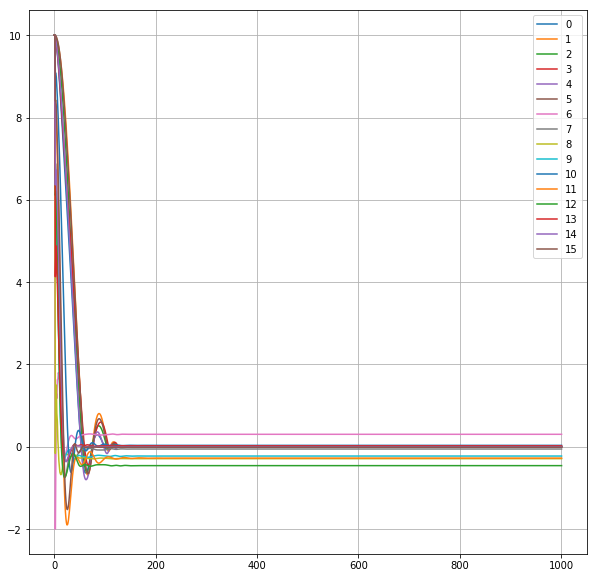

In [9]:
plt.figure(figsize=(10,10))
for l in range(16):
    plt.plot(range(1002), np.array(beta)[:,l], label = l)
plt.legend()
plt.grid()

## Lasso estimation

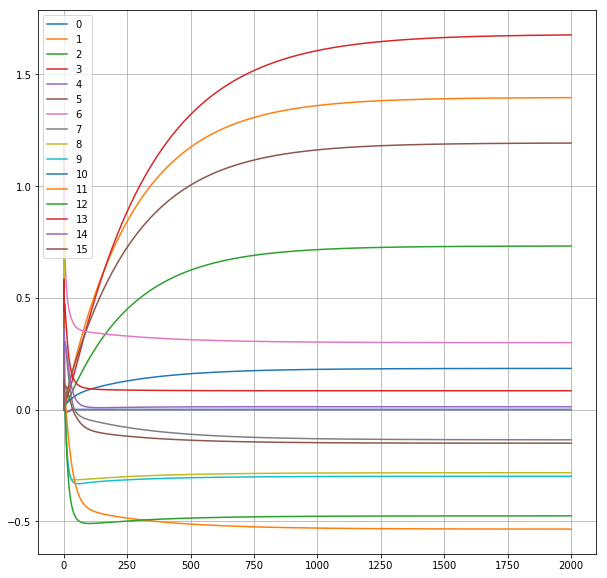

In [10]:
group_for_lasso = {'1':[0], '2':[1], '3':[2], '4':[3], '5':[4], '6':[5], '7':[6], '8':[7], 
                   '9':[8], '10':[9], '11':[10], '12':[11], '13':[12], '14':[13], '15':[14], '16':[15]}
beta, loss = proximal_gradient_method(X, Y, group_for_lasso, iteration = 2000, lbd = 0.35, stepsize = 0.002)
beta = np.array(beta)
plt.figure(figsize=(10,10))
for l in range(16):
    plt.plot(range(2001), beta[:,l], label = l)
plt.legend()
plt.grid()

In [11]:
beta[-1]

array([-0.        ,  1.39548161,  0.73149155,  1.67615236,  0.        ,
        1.19226959,  0.29919055, -0.13541986, -0.28258211, -0.29856128,
        0.18401504, -0.53489826, -0.4757216 ,  0.08405402,  0.01239512,
       -0.15057897,  3.04508769])

# Logistic group lasso

For Logistic regression, the objective function
$$g(\beta)=-y^TX\beta+\sum_{i=1}^n\log(1+\exp((X\beta)_i)),$$
therefore
$$\nabla g(\beta)=\sum_{i=1}^n[\sigma(x_i^T\beta)-y_i]x_i,$$
where $\sigma(x)=\frac{1}{1+e^{-x}}$. More succinctly,
$$\nabla g(\beta)=X^TS,$$
where $S_i=\sigma(x_i^T\beta)-y_i$.

In this scenario, we need to avoid overflow (see https://lingpipe-blog.com/2012/02/16/howprevent-overflow-underflow-logistic-regression/)

In [12]:
from scipy.io import loadmat

In [13]:
training_set = loadmat("Datasets\\Q4c_movies\moviesTrain.mat")
test_set = loadmat("Datasets\\Q4c_movies\moviesTest.mat")
group_information = loadmat("Datasets\\Q4c_movies\moviesGroups.mat")

In [14]:
X = training_set['trainRatings']
Y = training_set['trainLabels'].flatten()
X_test = test_set['testRatings']
Y_test = test_set['testLabels'].flatten()

In [15]:
group = {}
temp_group_titles = group_information['groupTitles'].flatten()
temp_rating = group_information['groupLabelsPerRating'].flatten()
for i in range(19):
    group[temp_group_titles[i][0]] = np.where(temp_rating == i)[0]

In [16]:
def loss_function(X, y, beta):
    score = np.dot(X, beta)
    logistic = np.zeros(len(y))
    for s in range(len(score)):
        if score[s] < 0:
            logistic[s] = np.log(1 + np.exp(score[s]))
        else:
            logistic[s] = score[s] + np.log(1 + np.exp(-score[s]))
    return -np.dot(y.T, score) + np.dot(np.ones(len(y)), logistic)
def regularizer(beta, group, lbd):
    penalty = 0
    for k in group.keys():
        penalty = penalty + np.sqrt(len(group[k])) * np.linalg.norm(beta[group[k]])
    return lbd * penalty
def sigmoid(x):
    return .5 * (1 + np.tanh(.5 * x))
def proximal_gradient_method(X, y, group, iteration = 1000, lbd = 5, stepsize = 10 ** -4, intercept = 0):
    beta = np.zeros(X.shape[-1]) + intercept
    beta_list = [beta]
    loss_list = []
    for i in range(iteration):
        gradient = np.dot(X.T, sigmoid(np.dot(X, beta)) - y)
        beta = beta - stepsize * gradient
        penalty = 0
        for k in group.keys():
            lbd_prime = lbd * stepsize * np.sqrt(len(group[k]))
            if np.linalg.norm(beta[group[k]]) > lbd_prime:
                beta[group[k]] = (1 - lbd_prime * 1.0 / np.linalg.norm(beta[group[k]])) * beta[group[k]]
            else:
                beta[group[k]] = beta[group[k]] * 0
        beta_list.append(beta)
        loss_list.append(loss_function(X, y, beta) + regularizer(beta, group, lbd))
    return beta_list, loss_list

## Accelerated version

In [17]:
def proximal_gradient_method_accelerated(X, y, group, iteration = 1000, lbd = 5, stepsize = 10 ** -4, intercept = 0):
    beta = np.zeros(X.shape[-1]) + intercept
    beta_list = [beta, beta]
    loss_list = []
    for i in range(iteration):
        beta = beta_list[-1] + 1.0 * (i - 2) / (i + 1) * (beta_list[-1] - beta_list[-2])
        gradient = np.dot(X.T, sigmoid(np.dot(X, beta)) - y)
        beta = beta - stepsize * gradient
        penalty = 0
        for k in group.keys():
            lbd_prime = lbd * stepsize * np.sqrt(len(group[k]))
            if np.linalg.norm(beta[group[k]]) > lbd_prime:
                beta[group[k]] = (1 - lbd_prime * 1.0 / np.linalg.norm(beta[group[k]])) * beta[group[k]]
            else:
                beta[group[k]] = beta[group[k]] * 0
            penalty = penalty + np.sqrt(len(group[k])) * np.linalg.norm(beta[group[k]])
        beta_list.append(beta)
        loss_list.append(loss_function(X, y, beta) + lbd * penalty)
    return beta_list, loss_list

## Backtracking line search

In [18]:
def prox_operator(beta, group, lbd, stepsize):
    for k in group.keys():
        lbd_prime = lbd * stepsize * np.sqrt(len(group[k]))
        if np.linalg.norm(beta[group[k]]) > lbd_prime:
            beta[group[k]] = (1 - lbd_prime * 1.0 / np.linalg.norm(beta[group[k]])) * beta[group[k]]
        else:
            beta[group[k]] = beta[group[k]] * 0
    return beta
def proximal_gradient_method_backtracking(X, y, group, iteration = 400, lbd = 5, stepsize = 1, intercept = 0, 
                                          shrinkage = 0.1):    
    beta = np.zeros(X.shape[-1]) + intercept
    beta_list = [beta]
    loss_list = []
    count_list = []
    for i in range(iteration):
        gradient = np.dot(X.T, sigmoid(np.dot(X, beta)) - y)
        step = stepsize
        count = 0
        G = 1.0 / step * (beta - prox_operator(beta - step * gradient, group, lbd, step))
        while (loss_function(X, y, beta - step * G) > loss_function(X, y, beta) - step * np.dot(gradient, G) + 0.5 * step * 
               np.linalg.norm(G) ** 2):
            step = step * shrinkage
            G = 1.0 / step * (beta - prox_operator(beta - step * gradient, group, lbd, step))
            count = count + 1
        count_list.append(count)
        beta = beta - step * gradient
        beta = prox_operator(beta, group, lbd, step)
        beta_list.append(beta)
        loss_list.append(loss_function(X, y, beta) + regularizer(beta, group, lbd))
    return beta_list, loss_list, count_list

In [19]:
coef_1, loss = proximal_gradient_method(X, Y, group, iteration = 1000, lbd = 5, stepsize = 10 ** -4, 
                                        intercept = np.random.normal(size = len(X.T)))
#print '''The sol to vanilla method is 
#{}'''.format(beta[-1])
coef_2, loss_2 = proximal_gradient_method_accelerated(X, Y, group, iteration = 1000, lbd = 5, stepsize = 10 ** -4, 
                                                      intercept = np.random.normal(size = len(X.T)))
#print '''The sol to accelerated method is 
#{}'''.format(beta[-1])
coef_3, loss_3, count_list= proximal_gradient_method_backtracking(X, Y, group, iteration = 400, lbd = 5, stepsize = 1, 
                                                                  shrinkage = 0.1, intercept = np.random.normal(size = len(X.T)))

In [20]:
sum(count_list)

1411

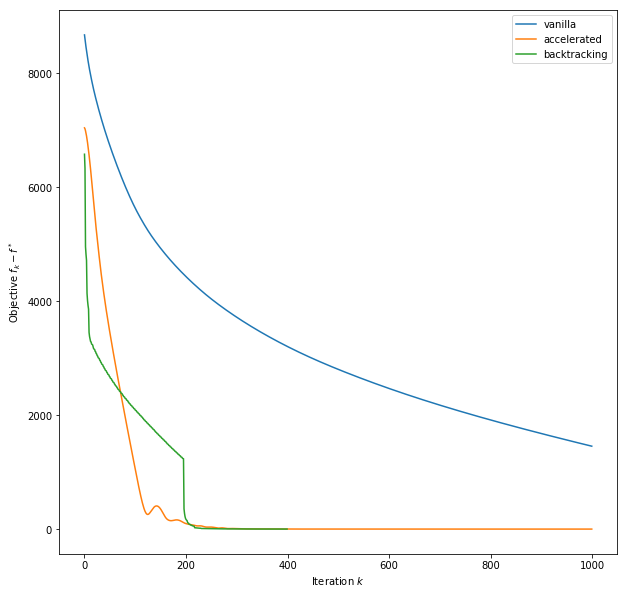

In [21]:
f_star = 330
plt.figure(figsize=(10,10))
plt.plot(range(1000), (np.array(loss) - f_star), label = "vanilla")
plt.plot(range(1000), (np.array(loss_2) - f_star), label = "accelerated")
plt.plot(range(400), (np.array(loss_3) - f_star), label = "backtracking")
plt.xlabel("Iteration $k$")
plt.ylabel("Objective $f_k-f^*$")
plt.legend()

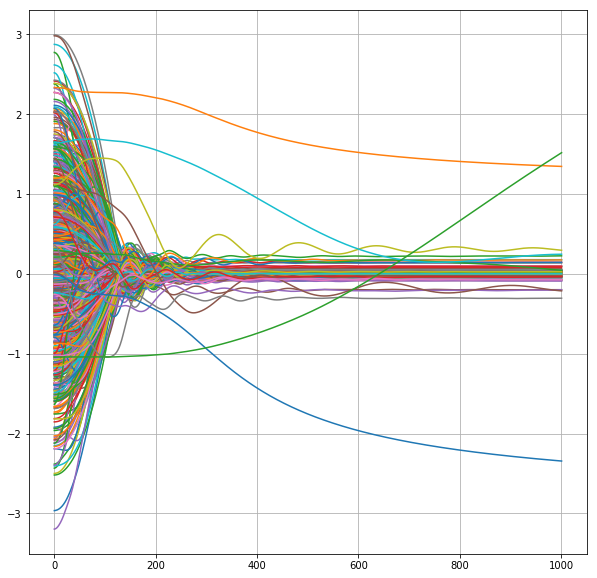

In [22]:
coef_2 = np.array(coef_2)
plt.figure(figsize=(10,10))
for l in range(833):
    plt.plot(range(1002), coef_2[:,l], label = l)
plt.grid()

## Important features

The features with non-zero coefficients:

In [23]:
important_features = np.where(coef_2[-1] != 0)[0]

The category of important features:

In [24]:
for key, value in group.items():
    for i in important_features:
        if i in value:
            print key
            break

Mystery
Romance
Fantasy
Crime
Children's
Animation
Musical
Thriller


## Prediction

In [25]:
coef_2 = np.array(coef_2[-1])

In [26]:
prediction = np.dot(X_test, coef_2)
prediction[np.where(prediction >= 0)] = 1
prediction[np.where(prediction < 0)] = 0
prediction

array([1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1.

Error rate:

In [27]:
np.linalg.norm(prediction - Y_test, 1) / len(Y_test)

0.24126984126984127